# Project:  Data Analysis of 187 Countries with respect to life expectancy, income, and children per woman.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### <a id='intro'></a>
## Introduction

> In this project we will analyzing data associated with information of people around the world accross 240 years. In particular we will be looking at trends related to 3 indicators that are income, life expectancy, and children per woman.

In the end we will answer two question:

Question 1: What are the effects of income on life expectancy and children per woman?

Question 2: How has income, life expectancy, and children per woman changes throught the years?

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

3 indicators where chosen from Gapminder World.

The indicators are :
1-life_expectancy_years

2-income_per_person_gdppercapita_ppp_inflation_adjusted

3-children_per_woman_total_fertility

The data will be loaded and checked for cleanliness.

### General Properties

In [105]:
lifeex_df = pd.read_csv('life_expectancy_years.csv')
income_df = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
children_df = pd.read_csv('children_per_woman_total_fertility.csv')

Here we loaded all the dataframes.

In [106]:
lifeex_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


We printed the first 5 lines of the first dataframe. Notice Andorra has null values(empty values) we will clean it in the next steps.

In [107]:
lifeex_df.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.00000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.00000,184.000000
mean,31.502717,31.461957,31.478804,31.383152,31.459239,31.586413,31.644565,31.598370,31.383152,31.310326,...,83.758152,83.87663,83.996196,84.119022,84.236957,84.358152,84.478804,84.593478,84.71087,84.829891
std,3.814689,3.806303,3.938674,3.962376,3.934674,4.010884,4.110598,3.981247,4.087872,4.040580,...,5.600794,5.59444,5.589074,5.577601,5.570850,5.566060,5.556903,5.550234,5.54055,5.532609
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,67.100000,67.30000,67.400000,67.500000,67.600000,67.700000,67.800000,67.900000,68.00000,68.100000
25%,29.075000,28.975000,28.900000,28.900000,28.975000,29.075000,29.075000,29.075000,28.975000,28.875000,...,79.500000,79.70000,79.800000,79.900000,80.075000,80.200000,80.375000,80.475000,80.57500,80.775000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,84.200000,84.35000,84.450000,84.550000,84.650000,84.750000,84.850000,85.000000,85.15000,85.250000
75%,33.825000,33.900000,33.825000,33.625000,33.725000,33.825000,33.925000,33.925000,33.725000,33.625000,...,88.125000,88.22500,88.325000,88.500000,88.600000,88.700000,88.800000,88.900000,89.00000,89.100000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,93.700000,93.90000,94.000000,94.100000,94.200000,94.300000,94.400000,94.500000,94.70000,94.800000


In [108]:
lifeex_df.fillna(lifeex_df.mean(), inplace=True)

Here we cleaned the dataframe by replacing null values with the mean for each year. This was done to allow us to use the data from the other dataframes such as income and children per woman without having null vales for life expectancy.

In [109]:
lifeex_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.200000,28.200000,28.200000,28.200000,28.200000,28.200000,28.100000,28.10000,28.100000,...,76.500000,76.60000,76.700000,76.900000,77.000000,77.100000,77.300000,77.400000,77.50000,77.700000
1,Albania,35.400000,35.400000,35.400000,35.400000,35.400000,35.400000,35.400000,35.40000,35.400000,...,87.400000,87.50000,87.600000,87.700000,87.800000,87.900000,88.000000,88.100000,88.20000,88.300000
2,Algeria,28.800000,28.800000,28.800000,28.800000,28.800000,28.800000,28.800000,28.80000,28.800000,...,88.300000,88.40000,88.500000,88.600000,88.700000,88.800000,88.900000,89.000000,89.10000,89.200000
3,Andorra,31.502717,31.461957,31.478804,31.383152,31.459239,31.586413,31.644565,31.59837,31.383152,...,83.758152,83.87663,83.996196,84.119022,84.236957,84.358152,84.478804,84.593478,84.71087,84.829891
4,Angola,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.00000,27.000000,...,78.700000,78.90000,79.000000,79.100000,79.300000,79.400000,79.500000,79.700000,79.80000,79.900000


Now we see that for the country of Andorra the values have been replaced.

In [110]:
income_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


We printed the first 5 lines of the second dataframe.

In [111]:
income_df.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,978.523316,978.948187,980.725389,980.922280,981.911917,982.502591,982.829016,985.419689,980.937824,982.393782,...,23142.378238,23613.119171,24083.461140,24577.430052,25077.678756,25576.476684,26107.564767,26635.953368,27180.512953,27730.725389
std,579.633227,579.915248,582.565512,582.032626,583.963199,584.043985,584.097850,590.514505,578.200194,581.878397,...,23670.673835,24162.379036,24635.072766,25136.440969,25646.475260,26138.360102,26707.571366,27233.418469,27813.430077,28356.570830
min,250.000000,250.000000,249.000000,249.000000,249.000000,249.000000,248.000000,248.000000,248.000000,248.000000,...,557.000000,566.000000,577.000000,588.000000,600.000000,612.000000,625.000000,637.000000,650.000000,664.000000
25%,592.000000,592.000000,592.000000,592.000000,592.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,5180.000000,5280.000000,5380.000000,5490.000000,5600.000000,5710.000000,5830.000000,5950.000000,6070.000000,6190.000000
50%,817.000000,822.000000,826.000000,831.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,...,15400.000000,15700.000000,16000.000000,16400.000000,16700.000000,17000.000000,17400.000000,17700.000000,18100.000000,18500.000000
75%,1160.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1160.000000,1170.000000,...,34200.000000,34800.000000,35500.000000,36200.000000,37000.000000,37700.000000,38500.000000,39300.000000,40100.000000,40900.000000
max,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,...,149000.000000,153000.000000,156000.000000,159000.000000,162000.000000,165000.000000,169000.000000,172000.000000,176000.000000,179000.000000


In [112]:
income_df.fillna(income_df.mean(), inplace=True)

Now all missing values will be replaced by the mean.

In [113]:
income_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In [114]:
children_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,1.81,1.81,1.81,1.81,1.81,1.81,1.81,1.82,1.82,1.82


We printed the first 5 lines of the third dataframe.

In [115]:
children_df.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,6.110707,6.107663,6.111033,6.110054,6.110435,6.110217,6.105815,6.104511,6.096359,6.084457,...,1.894239,1.890870,1.888098,1.885707,1.882935,1.880380,1.878261,1.876033,1.873478,1.873478
std,0.791456,0.795118,0.789068,0.788346,0.788456,0.784976,0.790403,0.791440,0.806280,0.834796,...,0.196231,0.190281,0.184809,0.179226,0.173738,0.168261,0.163354,0.158414,0.153074,0.153074
min,4.040000,4.040000,3.910000,4.050000,3.940000,4.060000,4.070000,4.050000,4.000000,3.210000,...,1.440000,1.440000,1.450000,1.450000,1.450000,1.450000,1.450000,1.450000,1.450000,1.450000
25%,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,...,1.770000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000
50%,6.190000,6.190000,6.190000,6.190000,6.190000,6.190000,6.190000,6.180000,6.160000,6.160000,...,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000
75%,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,...,1.930000,1.930000,1.922500,1.922500,1.922500,1.920000,1.920000,1.912500,1.910000,1.910000
max,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,...,2.630000,2.600000,2.580000,2.550000,2.530000,2.510000,2.500000,2.480000,2.460000,2.460000


In [116]:
children_df.fillna(children_df.mean(), inplace=True)

Missing values are replaced by the mean.

In [117]:
years = pd.Series(range(1800,2040)).astype(str)
lifeex_df1 = pd.melt(lifeex_df,id_vars=['country'],value_vars = years, var_name='Year',value_name='life_expectancy_years')
lifeex_df1.describe()

,life_expectancy_years
count,44880.000000
mean,45.869520
std,18.110957
min,1.010000
25%,31.500000
50%,36.600000
75%,63.100000
max,87.600000


In [118]:
income_df1 = pd.melt(income_df,id_vars=['country'],value_vars = years, var_name='Year',value_name='income_per_person_gdppercapita_ppp_inflation_adjusted')



In [119]:
children_df1 = pd.melt(children_df,id_vars=['country'],value_vars = years, var_name='Year',value_name='children_per_woman_total_fertility')

In [120]:
income_df1.describe()

,income_per_person_gdppercapita_ppp_inflation_adjusted
count,46320.000000
mean,6339.871611
std,13183.875469
min,245.000000
25%,896.000000
50%,1740.000000
75%,4762.500000
max,179000.000000


In [121]:
children_df1.describe()

,children_per_woman_total_fertility
count,44160.000000
mean,5.143811
std,1.793541
min,1.120000
25%,3.910000
50%,5.770000
75%,6.550000
max,8.870000


Since we have 3 dataframes we will first melt each dataframe.

In [122]:
lifeincome_df = pd.merge(lifeex_df1, income_df1, how='left', left_on=['country', 'Year'], right_on = ['country', 'Year'] )
lifeincome_df.head()

,country,Year,life_expectancy_years,income_per_person_gdppercapita_ppp_inflation_adjusted
0,Afghanistan,1800,28.200000,603
1,Albania,1800,35.400000,667
2,Algeria,1800,28.800000,715
3,Andorra,1800,31.502717,1200
4,Angola,1800,27.000000,618


In [123]:
all_df = pd.merge(lifeincome_df, children_df1, how='left', left_on=['country', 'Year'], right_on = ['country', 'Year'] )
all_df.head()

,country,Year,life_expectancy_years,income_per_person_gdppercapita_ppp_inflation_adjusted,children_per_woman_total_fertility
0,Afghanistan,1800,28.200000,603,7.00
1,Albania,1800,35.400000,667,4.60
2,Algeria,1800,28.800000,715,6.99
3,Andorra,1800,31.502717,1200,NaN
4,Angola,1800,27.000000,618,6.93


Now we merged all the dataframes into one dataframe.

In [124]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44880 entries, 0 to 44879
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   country                                                44880 non-null  object 
 1   Year                                                   44880 non-null  object 
 2   life_expectancy_years                                  44880 non-null  float64
 3   income_per_person_gdppercapita_ppp_inflation_adjusted  44880 non-null  int64  
 4   children_per_woman_total_fertility                     44160 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ MB


In [125]:
all_df.describe()

,life_expectancy_years,income_per_person_gdppercapita_ppp_inflation_adjusted,children_per_woman_total_fertility
count,44880.000000,44880.000000,44160.000000
mean,45.869520,6196.456863,5.143811
std,18.110957,12990.642538,1.793541
min,1.010000,245.000000,1.120000
25%,31.500000,891.000000,3.910000
50%,36.600000,1720.000000,5.770000
75%,63.100000,4660.000000,6.550000
max,87.600000,179000.000000,8.870000


In [126]:
all_df.groupby('country').mean()

,life_expectancy_years,income_per_person_gdppercapita_ppp_inflation_adjusted,children_per_woman_total_fertility
country,,,
Afghanistan,37.825708,1408.962500,6.716625
Albania,49.800417,3672.900000,4.069833
Algeria,44.300000,5077.112500,6.143833
Andorra,48.520956,16307.333333,NaN
Angola,37.713750,2560.570833,6.807000
...,...,...,...
Venezuela,47.310833,6702.375000,4.999250
Vietnam,44.845000,2114.416667,4.306542
Yemen,35.592500,1801.816667,6.626292


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 What are the effects of income on life expectancy and children per woman?
This analysis will look into the effects of an income have on life expectancy and woman fertility. We will look at the median of the income and split the income into either low or high income.

In [127]:
income_median = all_df['income_per_person_gdppercapita_ppp_inflation_adjusted'].median()

In [128]:
lowIncome = all_df.query('income_per_person_gdppercapita_ppp_inflation_adjusted <=@income_median')

In [129]:
highIncome = all_df.query('income_per_person_gdppercapita_ppp_inflation_adjusted >@income_median')

In [130]:
lowIncome.mean()

Year                                                            inf
life_expectancy_years                                     33.657132
income_per_person_gdppercapita_ppp_inflation_adjusted    943.683405
children_per_woman_total_fertility                         6.192447
dtype: float64

In [131]:
highIncome.mean()

Year                                                              inf
life_expectancy_years                                    5.810806e+01
income_per_person_gdppercapita_ppp_inflation_adjusted    1.146048e+04
children_per_woman_total_fertility                       4.093274e+00
dtype: float64

Text(0, 0.5, 'Number of people')

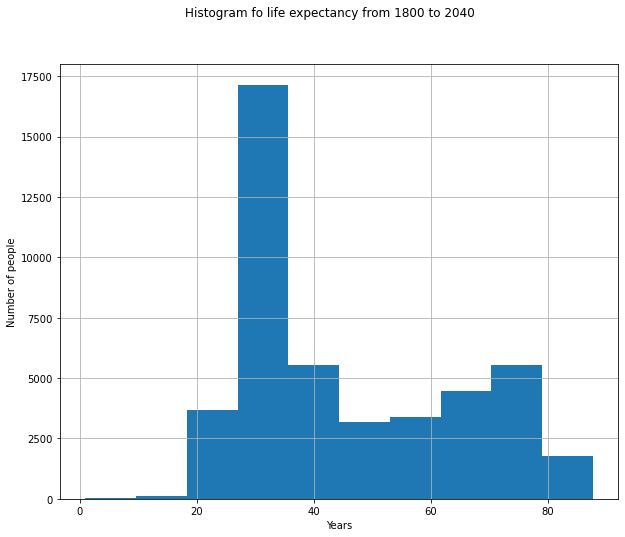

In [132]:
viz1 = all_df['life_expectancy_years'].hist(figsize=(10,8))
plt.suptitle("Histogram fo life expectancy from 1800 to 2040")
viz1.set_xlabel("Years")
viz1.set_ylabel("Number of people")

Text(0, 0.5, 'Number of people')

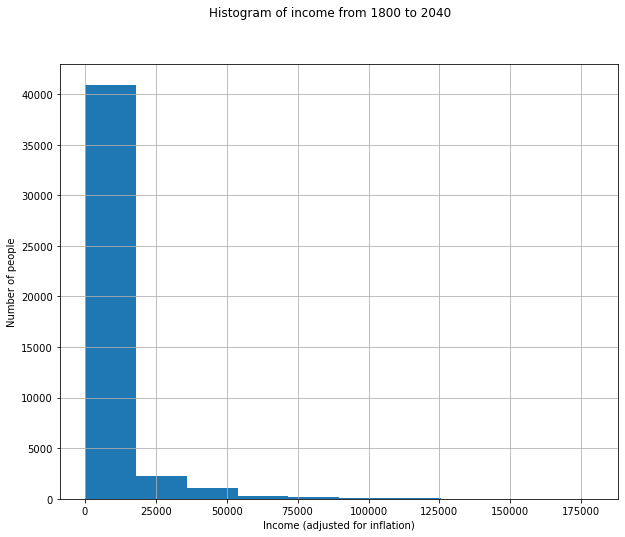

In [133]:
viz1 = all_df['income_per_person_gdppercapita_ppp_inflation_adjusted'].hist(figsize=(10,8))
plt.suptitle("Histogram of income from 1800 to 2040")
viz1.set_xlabel("Income (adjusted for inflation)")
viz1.set_ylabel("Number of people")

Text(0, 0.5, 'Number of people')

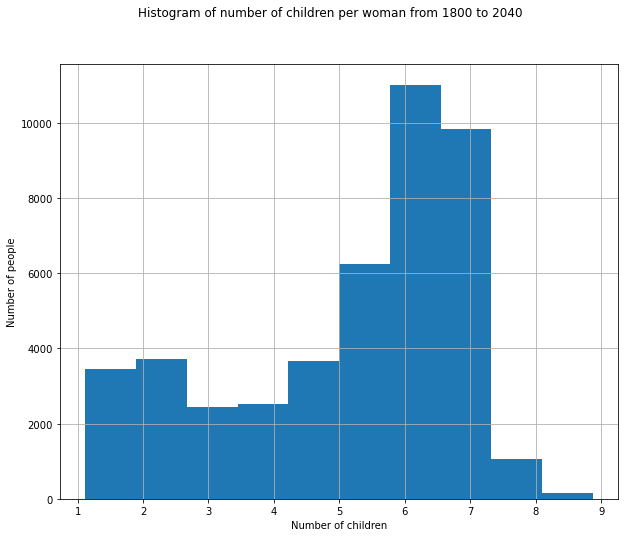

In [134]:
viz1 = all_df['children_per_woman_total_fertility'].hist(figsize=(10,8))
plt.suptitle("Histogram of number of children per woman from 1800 to 2040")
viz1.set_xlabel("Number of children")
viz1.set_ylabel("Number of people")

The is a histogram of all 3 indicators from the year 1800 to 2040

<a id='eda'></a>
### Effects on Income

The results show that people with low income have a median life expectancy of 33 years. While high income people have a median of 53 years.

Also we can see that the income does have an effect on children per woman. People with high income have 4-5 children, but low income people have 6 children.

So there is a correlation between income and both life expectancy and number of children per woman. 

### Research Question 2  How has income, life expectancy, and children per woman changes throught the years?
This analysis will look at the trends of income, Life Expectancy, and Women Fertility across time. This analysis will go from the year 1800 to 2040 and display the trends.

In [135]:
acrossYears_df = all_df.groupby('Year', as_index= False).mean()

In [136]:
acrossYears_df.head()

,Year,life_expectancy_years,income_per_person_gdppercapita_ppp_inflation_adjusted,children_per_woman_total_fertility
0,1800,31.502717,974.508021,6.110707
1,1801,31.461957,974.893048,6.107663
2,1802,31.478804,976.673797,6.111033
3,1803,31.383152,976.823529,6.110054
4,1804,31.459239,977.844920,6.110435


In [137]:
graph_df = all_df.groupby('Year', as_index= False).mean()
def graphPlot(graph_df, xax,yax):
    graph_df = all_df.groupby('Year', as_index= False).mean()
    graph_df.plot(x = xax ,  y = yax, visible=True, figsize=(25,10))
    plt.suptitle('Changes throught the years 1800 upto 2040', fontsize=24)
    plt.xlabel(xax, fontsize=24)
    plt.ylabel(yax, fontsize=24)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    x_axis = pd.Series(range(1800,2040)).astype(str)

    

The function graphPlot will help us plot graphs using only 3 arguments this allows us to avoid repetitive code.

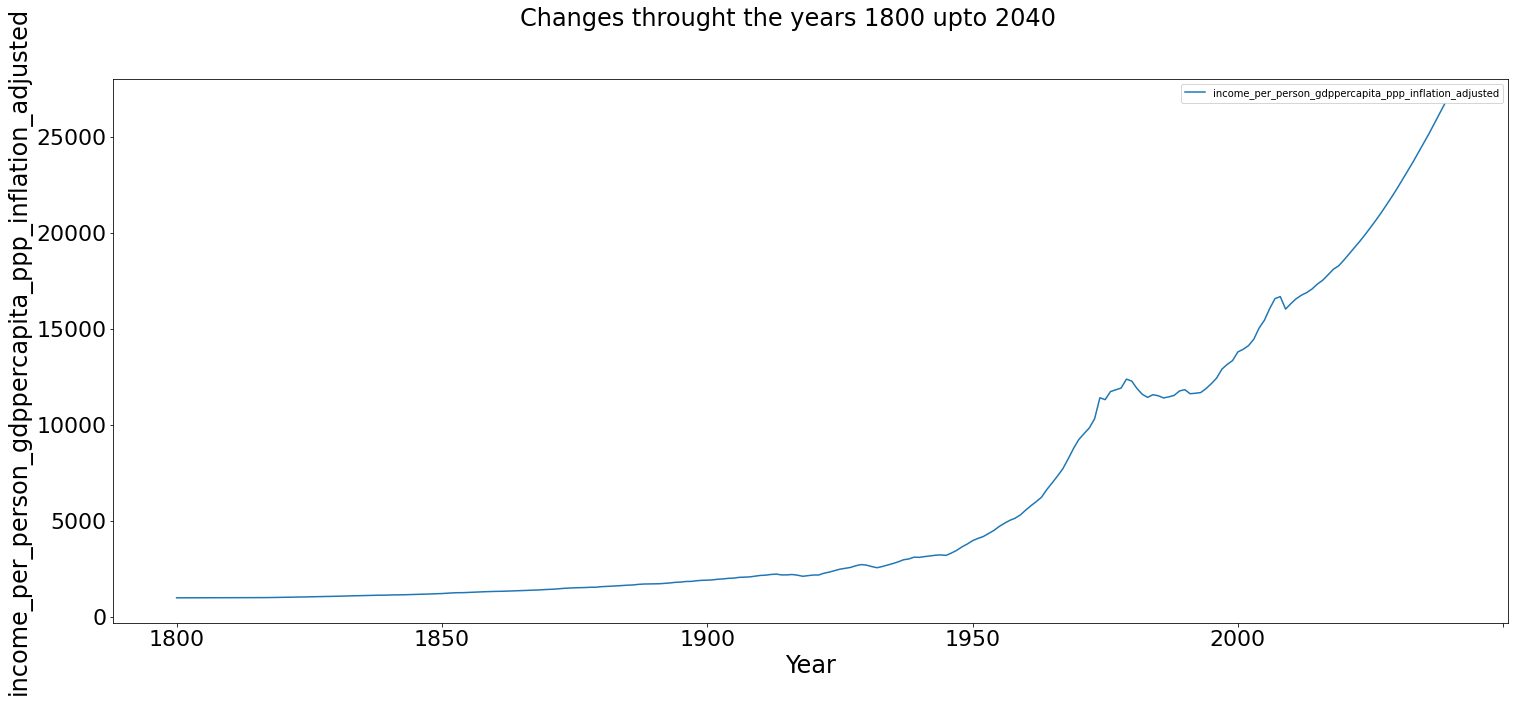

In [138]:
graphPlot(acrossYears_df,'Year', 'income_per_person_gdppercapita_ppp_inflation_adjusted')

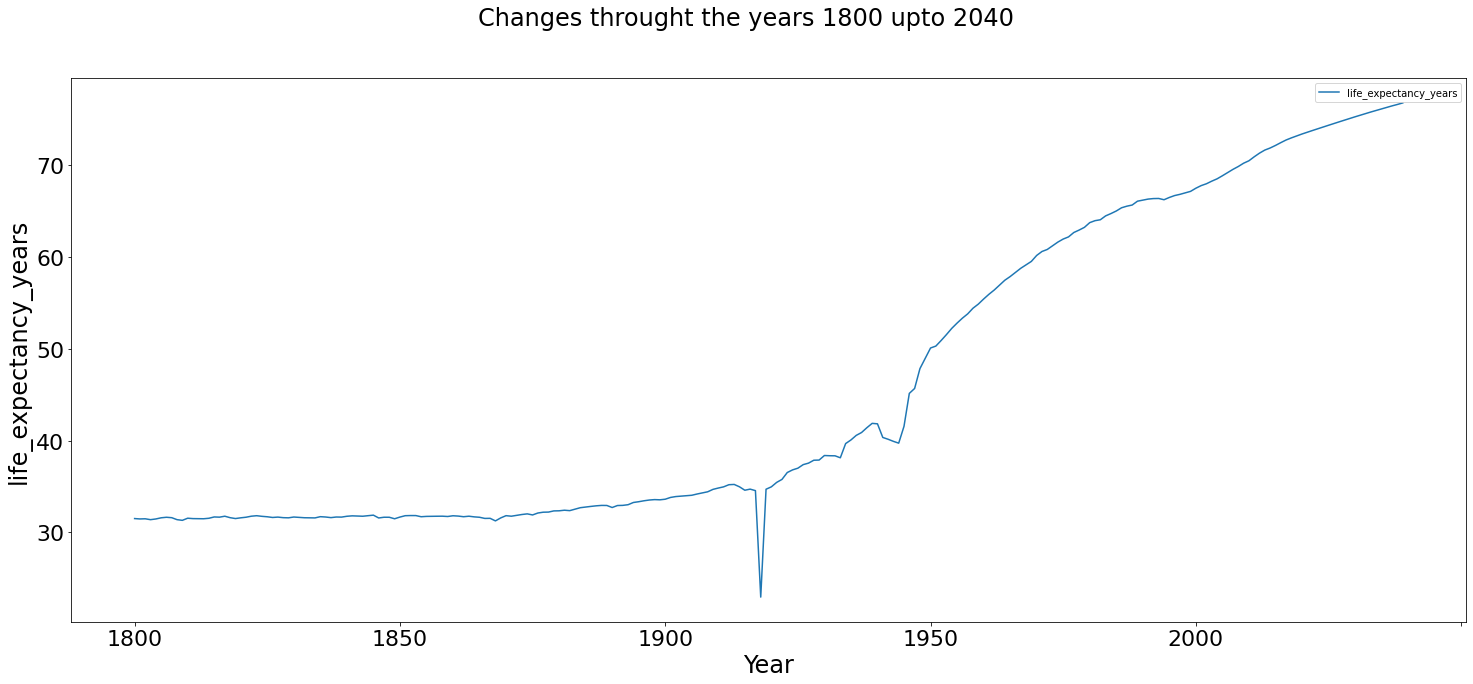

In [139]:
graphPlot(acrossYears_df,'Year', 'life_expectancy_years')

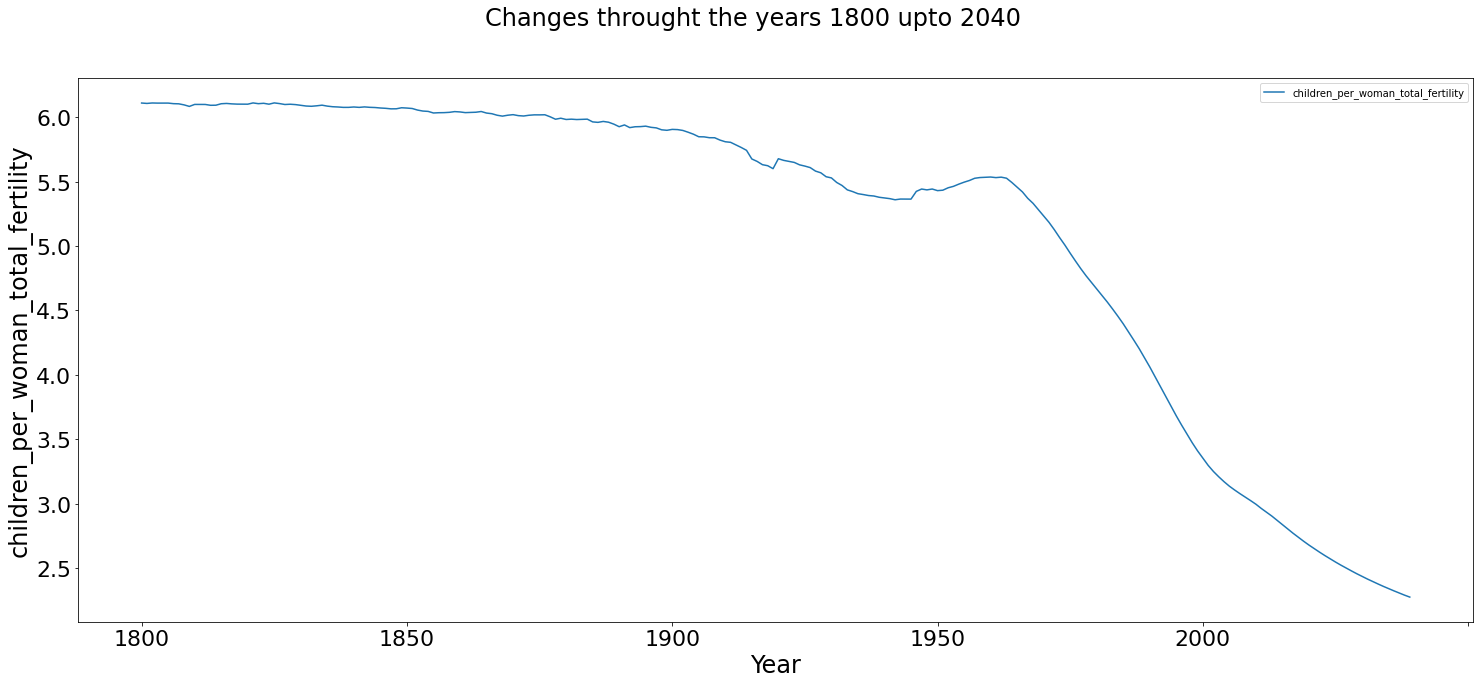

In [140]:
graphPlot(acrossYears_df,'Year', 'children_per_woman_total_fertility')

<a id='eda'></a>
### Trends from 1800 to 2040
As shown in the graph the income and life expectancy is increasing but the rate of women having children is decreasing. This might be due to the fact that more woman are entering the workforce thorught the years and have little time to have children but more data is required to prove this idea.



<a id='conclusions'></a>
## Conclusions

This report uses 3 indicatores which are income, life expectancy, and children per woman to investigate trends between the selected metrics. The analysis tackled 2 Questions.

Question 1: What are the effects of income on life expectancy and children per woman?

Question 2: How has income, life expectancy, and children per woman changes throught the years? 

This analysis shows that globally people are living longer and are earning more and this trend has been consistent through the 220 years of recoreded data. Furthermore there is a strong correlation between income, life expectancy and children per woman.

The size of the data is enough as it covers 187 countries from the year 1800 to 2040 but since the data for the income and life expectancy isn't specific to females this does pose a data limitation for the analysis.